

1. Classify the following model equation: 

$$x_t = ax_{t-1}x_{t-2} + bx_{t-3} + \sin t$$

This model equation is a nonautonomous, nonlinear and higher order difference equation. Since it contain $$\sin t$$ inside such that it is nonlinear. 
It also contain $$ax_{t-1}x_{t-2}$$ such that it is higher order. 
It contain t in $$\sin t$$ that it is nonautonomous. 

2.  Convert the above model equation into an autonomous, first-order difference equation. 




**Show your work.**  You can use `$$` for display-format equations, e.g.

Set up the equation:

$$
n_{t} = x_{t_1}
$$

$$
y_{t} = x_{t_2}
$$

$$
z_{t} = z_{t-1} \cos 1 + z_{t-1}' \sin 1 , z_{0} = \sin 1 $$ while $$ z_{t-1} = \sin t
$$

The equation becomes $$ x_{t} = ax_{t-1}n_{t-1} + by_{t-1} + z_{t-1} $$

... solution here





In this question you will model and simulate the *obligate mutualism* interaction between two species. By *obligate mutualism* we mean a type of symbiosis in which none of the two species can survive without the other. One example of such obligate mutualism relationship is that between the leaf-cutter ants and the fungus they farm (https://www.pbs.org/video/deep-look-ants/). 

Leaf-cutter ants harvest leaves and use them to cultivate their own food, a type of fungus, in underground gardens. The ants themselves only feed on fungus and do not eat the leaves. The increase in the population of ants is due to consumption of the fungus while the increase in the biomass of fungus is due to the agricultural services provided by the ants. So this interaction is mutually beneficial to both species. It is also an obligate relationship: in the absence of fungus, the ants die of starvation; and without the leaves provided by the ants, the fungus cannot survive.

#### Part A: (4p)
1. **Propose a *simple model* that describes such a mutualistic relationship.** Assume, for instance, that the inherent dynamics of each species exhibits exponential growth, and that the functional response of each species from the presence of the other species is of *type I.* (That is, the increase in the growth ratio of each population is proportional with the size of the other population.)  

The two spices I choose are sheep and wolf. Sheep's population is proportional to the  resource they have and the population of  wolfs. And the population of wolf is depends on the population of sheep and the death rate of wolf. If there is no wolf, there will not be enough resource for sheep to eat that sheep will not survive duo to starvation, and if there is too much wolf that kill everyone of sheep, wolf will not find the food any more.

**My assumption:**
1. sheep's population is proportional to the population of wolf its growth rate and its death rate.
2. wolf's population is proportional to the population of sheep, growth rate of wolf and the death rate of wolf.
3. There is only finite resource that sheep can use, once it reach it limit, there will not be resource any more. And the growth of sheep will eventally drop to 0.

**The state variable of the system:**
- $s$ and $w$ represents the size of sheep and wolf respectively.

**The parameter of the system:**
- $gr_s$ and $gr_w$ is represent the growth rate of $s$ and $w$, respectively.
- $R$ represents the amount of resource that provided to sheep and $R_r$ represents its natural growth. $R_s$ is the amount of resource each sheep would consume.
- $d_w$ represents the natural death rate of wolf. And $d_s$ represents the natural death rate of sheep.

**Mathematical formulation of my assumption:**
- From assumption 1 that sheep's size depends on the wolf's population. Therefore it has to propotional to $(1- \frac{w}{s - 100})$ for each step. And by the natural growth rate of sheep $gr_s(1 - \frac{w}{s - 100})$ for each step. Thus$$s_t = s_{t-1} + s_{t-1}gr_s(1 - \frac{w}{s - 100}) - s_{t-1}d_s$$
- From assumtion 2 that wolf's population depends on the size of sheep. Therefore it has $\frac{s}{w}$ for each step. And also by assumption 2, that it will have natural growth rate $gr_w(\frac{s}{w})$ for each step and it has natural death rate that $d_w$. Thus $$w_t = w_{t-1} + w_{t-1}gr_w(\frac{s}{w}) - w_{t-1}d_w$$
- From assumtion 3 that resource is consumed by sheep that $R - R_s*s$ and it has its natural growth rate that $R_s$. Thus $$R_t = R_{t-1} - R_s*s + R_{t-1}*R_s$$

2. **Simulate the proposed simple model and discuss the behaviour of the system.** Is the model realistic? Can you adjust the model parameters to make it (more) realistic? Include a plot of the simulation result *and* a phase space portrait of the system.


#### Part B: (3p)
1. **Propose additional assumptions that make the model more realistic.** For instance, consider resource limitations, for one or both species; or density-dependent ant mortality rate due to energy spent by foraging for leaves and taking care of fungus.
2. **Reformulate the model to include the additional assumptions and simulate the new model.** Include a plot of the simulation result *and* a phase space portrait of the system. 

**Addition assumpition:**
1. $K_s$ and $K_w$ are the carrying capacity for $s$ and $w$, respectively.

**Mathematical formulation of my assumption:**
- From assumption 1 from above, the grow rate of $s$ would become $gr_s(1 - \frac{w}{s - 100})(1 - \frac{s}{K_s})$ for each step. The grow rate of $w$ would become $gr_w(\frac{s}{w})(1-\frac{w}{K_w})$.


*You are encouraged to re-use whatever code is useful from class/lab. You can do that here:*

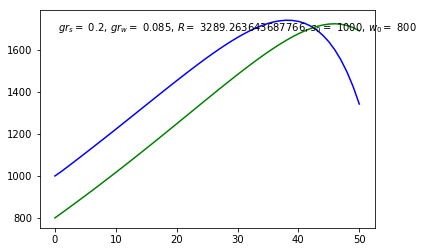

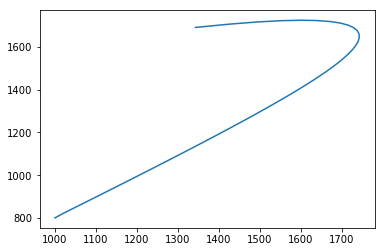

In [87]:
from pylab import *

#Part A 1:
#simple model between sheep and wolf. 
#sheep's population depends on the grass resource and the population of wolf. 
#wolf's population depends on the population of sheep and it has death rate since wolf always fight for food
#


#define the resource, growth rate and run time

gr_w = 0.085
d_w = 0.08
R_r = 1.01
R_s = 1.0
run_time = 50


#initialize
def initializeA():
    global s, w, sresult, wresult, gr_s, R
    s = 1000
    w = 800
    gr_s = 0.18
    R = 2000
    sresult = [s]
    wresult = [w]
    
#observe
def observeA():
    global s, w, sresult, wresult, gr_s, R
    sresult.append(s)
    wresult.append(w)

#update
def updateA():
    global s, w, sresult, wresult, gr_s, R
    nextR = R - R*R_s + R*R_r
    if(R <= 0):
        gr_s = 0
    nexts = s + gr_s*s* (1 - w/(s-100))
    nextw = w + gr_w*w*(s/(w)) - w*d_w
    s = nexts
    w = nextw
    R = nextR
    gr_s = 0.2
    
initializeA()

for t in range(run_time):
    updateA()
    observeA()



#Part A 2:
#plot the graph of two spices
plot(sresult, color='blue')
plot(wresult, color='green')
text(.5, max(max(sresult),max(wresult)), "$gr_s=$ {}, $gr_w=$ {}, $R=$ {}, $s_0=$ {}, $w_0=$ {}".format(gr_s,gr_w,R,sresult[0],wresult[0]), horizontalalignment='left', verticalalignment='top' )
show()

#plot phase potrait of the system
plot(sresult, wresult)
show()


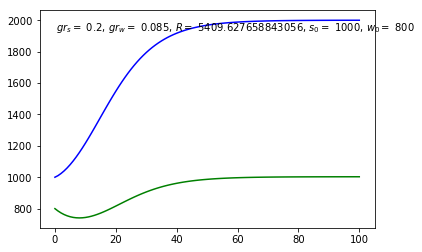

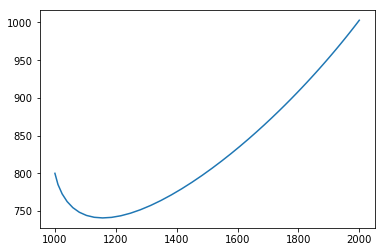

In [85]:
#Part B
#include the carry capacity for each spices.
#K_s represents sheep capacity, K_w represents wolf capacity

#define the resource, growth rate and run time

gr_w = 0.085
d_w = 0.08
R_r = 1.01
R_s = 1.0
run_time = 100
K_s = 2000.0
K_w = 1900.0

#initialize
def initializeB():
    global s, w, sresult, wresult, gr_s, R
    s = 1000
    w = 800
    gr_s = 0.18
    R = 2000
    sresult = [s]
    wresult = [w]
    
#observe
def observeB():
    global s, w, sresult, wresult, gr_s, R
    sresult.append(s)
    wresult.append(w)

#update
def updateB():
    global s, w, sresult, wresult, gr_s, R
    nextR = R - R*R_s + R*R_r
    if(R <= 0):
        gr_s = 0
    nexts = s + gr_s*s* (1 - w/(s-100))*(1-s/K_s)
    nextw = w + gr_w*w*(s/(w))*(1-w/K_w) - w*d_w
    s = nexts
    w = nextw
    R = nextR
    gr_s = 0.2
    
initializeB()

for t in range(run_time):
    updateB()
    observeB()



#Part B 2:
#plot the graph of two spices
plot(sresult, color='blue')
plot(wresult, color='green')
text(.5, max(max(sresult),max(wresult)), "$gr_s=$ {}, $gr_w=$ {}, $R=$ {}, $s_0=$ {}, $w_0=$ {}".format(gr_s,gr_w,R,sresult[0],wresult[0]), horizontalalignment='left', verticalalignment='top' )
show()

#plot phase potrait of the system
plot(sresult, wresult)
show()
